In [132]:
from scipy.integrate import odeint as eqsolver
import numpy as np

In [609]:
def scatter(X, t, m, sign):
    x, y, u, v = X
    # Hard coded potential
    dVdx = (1./m)*sign*2*y**2*x*(1-x**2)*np.exp(-(x**2+y**2))
    dVdy = (1./m)*sign*2*x**2*y*(1-y**2)*np.exp(-(x**2+y**2))
    # Derivative
    dXdt = [u, v, -dVdx, -dVdy]
    return dXdt

In [610]:
# Initial conditions
angle = 90 # degrees
# Location
x0 = -0 # b
y0 = -100
# Velocity
V0 = 3

X0 = [x0, y0, V0*np.cos(angle*np.pi/180.), V0*np.sin(angle*np.pi/180.)]

In [611]:
t = np.linspace(0, 1000, 10001)

In [612]:
m = 1.
sign = -1
solution = eqsolver(scatter, X0, t, args=(m, sign))

In [260]:
solution

array([[ 0.00000000e+00, -1.00000000e+02,  1.83697020e-16,
         3.00000000e+00],
       [ 1.83697020e-16, -9.70000000e+01,  1.83697020e-16,
         3.00000000e+00],
       [ 3.67394040e-16, -9.40000000e+01,  1.83697020e-16,
         3.00000000e+00],
       ...,
       [ 1.83329626e-13,  2.89400000e+03,  1.83697020e-16,
         3.00000000e+00],
       [ 1.83513323e-13,  2.89700000e+03,  1.83697020e-16,
         3.00000000e+00],
       [ 1.83697020e-13,  2.90000000e+03,  1.83697020e-16,
         3.00000000e+00]])

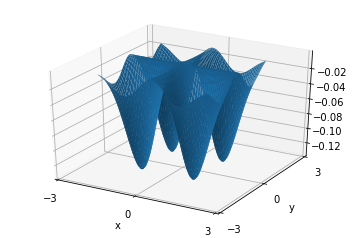

In [261]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x = np.linspace(-2, 2, 100)
y = np.linspace(-2, 2, 100)

xx, yy = np.meshgrid(x, y)

V = sign*xx**2*yy**2*np.exp(-(np.square(xx)+np.square(yy)))

ax.set_xticks(np.linspace(-3, 3, 3))
ax.set_xlim(-3, 3)
ax.set_xlabel('x')

ax.set_yticks(np.linspace(-3, 3, 3))
ax.set_ylim(-3,3)
ax.set_ylabel('y')

ax.plot_surface(xx, yy, V)

fig.savefig('four_peaks2.png', dpi=300)

In [262]:
solution[:, 0][-1], solution[:, 1][-1]

(1.8369701987210297e-13, 2900.0)

In [263]:
theta = solution[:, 3][-1]/solution[:, 2][-1]
np.arctan(theta)

1.5707963267948966

In [571]:
def scattering_experiment(b, t, V0=.5, y0=-10., angle=np.pi/2., m=.5, sign=1.):
    
    vx = 0. # set it to EXACTLY 0.
    vy = V0*np.sin(angle)
    print('vx', vx)
    print('vy', vy)
    
    def scatter(X, t, m, sign):
        x, y, u, v = X
        # Hard coded potential
        dVdx = (1./m)*sign*2*y**2*x*(1-x**2)*np.exp(-(x**2+y**2))
        dVdy = (1./m)*sign*2*x**2*y*(1-y**2)*np.exp(-(x**2+y**2))
        # Derivative
        dXdt = [u, v, -dVdx, -dVdy]
        return dXdt
    
    theta = []
    
    for x0 in b:
        X0 = [x0, y0, 0., vy]
        solution = eqsolver(scatter, X0, t, args=(m, sign))
        theta.append((180./np.pi)*np.arctan2(solution[:, 2][-1], solution[:, 3][-1]))
        
    return b, theta

vx 0.0
vy 0.5


/home/alex.olar@odigeo.org/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in true_divide
  


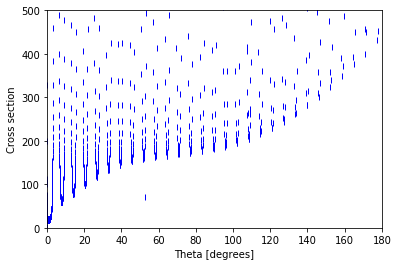

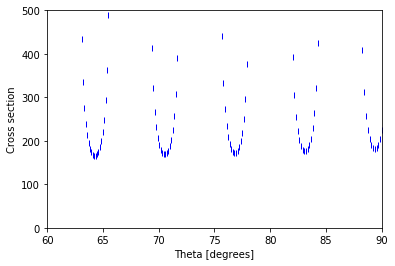

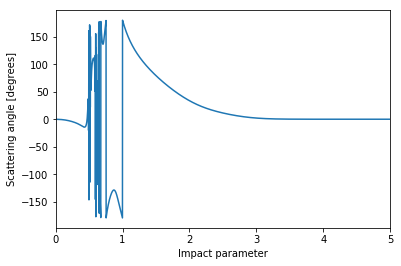

In [585]:
init_x = np.linspace(0., 5., 4001)
t = np.linspace(0., 1000., 1001)
b, theta = scattering_experiment(init_x, t, sign=1)

dThetadb = []
for i in range(0, len(b)-1):
    dThetadb.append(np.abs((theta[i+1] - theta[i])/(b[i+1] - b[i])))
cross_section = dThetadb*np.array(b[0:len(b)-1])/np.sin(theta[0:len(b)-1])
plt.xlabel('Theta [degrees]')
plt.ylabel('Cross section')
plt.xlim(0, 180)
plt.ylim(0, 500)
plt.plot(theta[0:len(b)-1], cross_section, 'b|')
plt.savefig('cross-pot-og1.png', dpi=200)
plt.show()

plt.xlabel('Theta [degrees]')
plt.ylabel('Cross section')
plt.xlim(60, 90)
plt.ylim(0, 500)
plt.plot(theta[1:], cross_section, 'b|')
plt.savefig('cross-pot-og2.png', dpi=200)
plt.show()

plt.xlim(0., 5.)
plt.xticks(np.linspace(0., 5, 6))
plt.xlabel('Impact parameter')

plt.ylabel('Scattering angle [degrees]')
plt.plot(b, theta)

plt.savefig('chaotic-scattering1.png', dpi=200)
plt.show()

In [588]:
init_x = np.linspace(0., 1., 8001)
t = np.linspace(0., 1000., 1001)
b, theta = scattering_experiment(init_x, t, sign=-1)

vx 0.0
vy 0.5


/home/alex.olar@odigeo.org/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in true_divide
  after removing the cwd from sys.path.


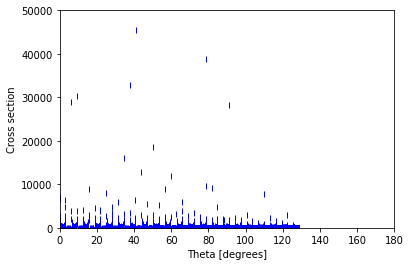

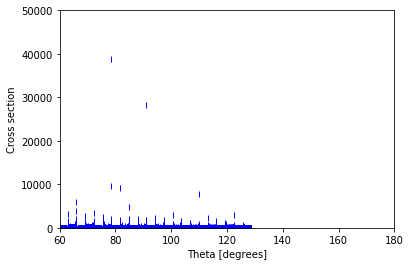

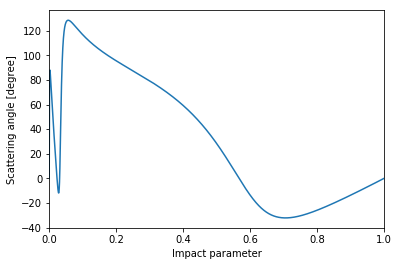

In [589]:
dThetadb = []
for i in range(0, len(b)-1):
    dThetadb.append(np.abs((theta[i+1] - theta[i])/(b[i+1] - b[i])))
cross_section = dThetadb*np.array(b[0:len(b)-1])/np.sin(theta[0:len(b)-1])
plt.xlabel('Theta [degrees]')
plt.ylabel('Cross section')
plt.xlim(0, 180)
plt.ylim(0, 50000)
plt.plot(theta[0:len(b)-1], cross_section, 'b|')
plt.savefig('cross-pot-og1highres_signed.png', dpi=200)
plt.show()

plt.xlabel('Theta [degrees]')
plt.ylabel('Cross section')
plt.xlim(60, 180)
plt.ylim(0, 50000)
plt.plot(theta[0:len(b)-1], cross_section, 'b|')
plt.savefig('cross-pot-og2highres_signed.png', dpi=200)
plt.show()

plt.xlim(0, 1.)
plt.xticks(np.linspace(0, 1, 6))
plt.xlabel('Impact parameter')

plt.ylabel('Scattering angle [degree]')
plt.plot(b, theta)

plt.savefig('chaotic-scattering2signed.png', dpi=200)
plt.show()

In [592]:
def scattering_experiment2(b, t, V0=.5, y0=-10., angle=np.pi/2., m=.5, sign=1.):
    
    vx = 0. # set it to EXACTLY 0.
    vy = V0*np.sin(angle)
    print('vx', vx)
    print('vy', vy)
    
    def scatter(X, t, m, sign):
        x, y, u, v = X
        # Hard coded potential
        dVdx = (1./m)*sign*2*x*(1-x**2)*np.exp(-(x**2+y**2))
        dVdy = -(1./m)*sign*x**2*2*y*np.exp(-(x**2+y**2))
        # Derivative
        dXdt = [u, v, -dVdx, -dVdy]
        return dXdt
    
    theta = []
    
    for x0 in b:
        X0 = [x0, y0, 0., vy]
        solution = eqsolver(scatter, X0, t, args=(m, sign))
        theta.append((180./np.pi)*np.arctan2(solution[:, 2][-1], solution[:, 3][-1]))
        
    return b, theta

vx 0.0
vy 0.5


/home/alex.olar@odigeo.org/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in true_divide
  
/home/alex.olar@odigeo.org/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in true_divide
  


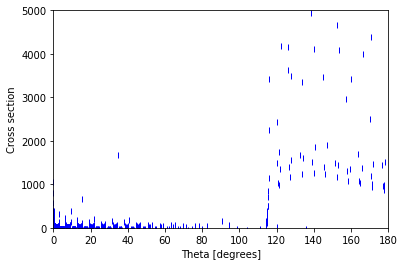

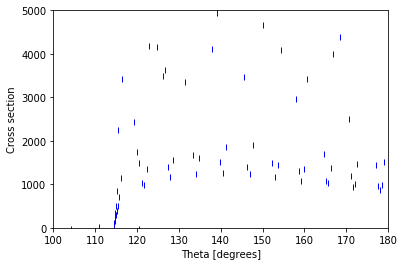

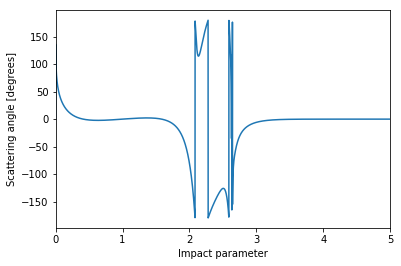

In [596]:
init_x = np.linspace(0., 5., 4001)
t = np.linspace(0., 1000., 1001)
b, theta = scattering_experiment2(init_x, t, sign=-1)

dThetadb = []
for i in range(0, len(b)-1):
    dThetadb.append(np.abs((theta[i+1] - theta[i])/(b[i+1] - b[i])))
cross_section = dThetadb*np.array(b[0:len(b)-1])/np.sin(theta[0:len(b)-1])
plt.xlabel('Theta [degrees]')
plt.ylabel('Cross section')
plt.xlim(0, 180)
plt.ylim(0, 5000)
plt.plot(theta[0:len(b)-1], cross_section, 'b|')
plt.savefig('cross-pot-co1signed.png', dpi=200)
plt.show()

plt.xlabel('Theta [degrees]')
plt.ylabel('Cross section')
plt.xlim(100, 180)
plt.ylim(0, 5000)
plt.plot(theta[1:], cross_section, 'b|')
plt.savefig('cross-pot-co2signed.png', dpi=200)
plt.show()

plt.xlim(0., 5.)
plt.xticks(np.linspace(0., 5, 6))
plt.xlabel('Impact parameter')

plt.ylabel('Scattering angle [degrees]')
plt.plot(b, theta)

plt.savefig('chaotic-scattering-co1signed.png', dpi=200)
plt.show()

In [602]:
init_x = np.linspace(0., 1., 6001)
t = np.linspace(0., 1000., 1001)
b, theta = scattering_experiment2(init_x, t, sign=-1)

vx 0.0
vy 0.5


/home/alex.olar@odigeo.org/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in true_divide
  after removing the cwd from sys.path.


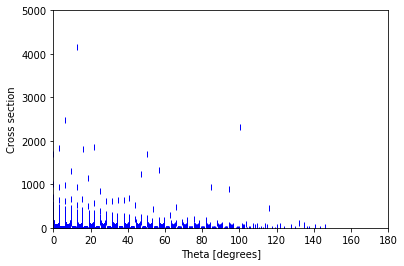

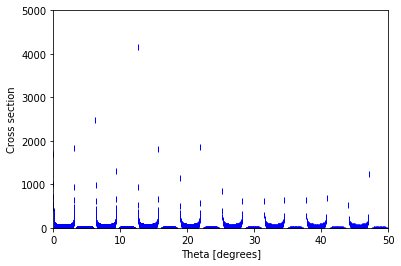

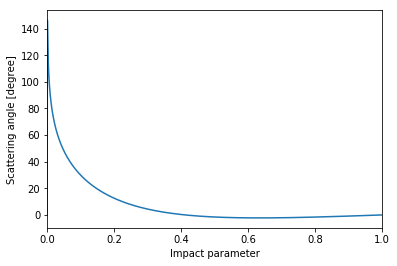

In [607]:
dThetadb = []
for i in range(0, len(b)-1):
    dThetadb.append(np.abs((theta[i+1] - theta[i])/(b[i+1] - b[i])))
cross_section = dThetadb*np.array(b[0:len(b)-1])/np.sin(theta[0:len(b)-1])
plt.xlabel('Theta [degrees]')
plt.ylabel('Cross section')
plt.xlim(0, 180)
plt.ylim(0, 5000)
plt.plot(theta[0:len(b)-1], cross_section, 'b|')
plt.savefig('cross-pot-co1highres_signed.png', dpi=200)
plt.show()

plt.xlabel('Theta [degrees]')
plt.ylabel('Cross section')
plt.xlim(0, 50)
plt.ylim(0, 5000)
plt.plot(theta[0:len(b)-1], cross_section, 'b|')
plt.savefig('cross-pot-co2highres_signed.png', dpi=200)
plt.show()

plt.xlim(0, 1.)
plt.xticks(np.linspace(0, 1, 6))
plt.xlabel('Impact parameter')

plt.ylabel('Scattering angle [degree]')
plt.plot(b, theta)

plt.savefig('chaotic-scattering-co2signed.png', dpi=200)
plt.show()

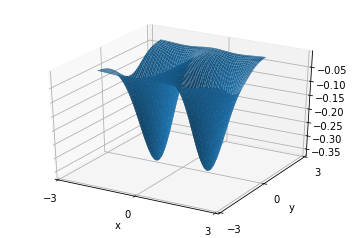

In [608]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x = np.linspace(-2, 2, 100)
y = np.linspace(-2, 2, 100)

xx, yy = np.meshgrid(x, y)

V = -xx**2*np.exp(-(np.square(xx)+np.square(yy)))

ax.set_xticks(np.linspace(-3, 3, 3))
ax.set_xlim(-3, 3)
ax.set_xlabel('x')

ax.set_yticks(np.linspace(-3, 3, 3))
ax.set_ylim(-3,3)
ax.set_ylabel('y')

ax.plot_surface(xx, yy, V)

fig.savefig('two_peaks2.png', dpi=300)

In [625]:
def scatter(X, t, m, sign):
        x, y, u, v = X
        # Hard coded potential
        dVdx = (1./m)*sign*2*x*(1-x**2)*np.exp(-(x**2+y**2))
        dVdy = -(1./m)*sign*x**2*2*y*np.exp(-(x**2+y**2))
        # Derivative
        dXdt = [u, v, -dVdx, -dVdy]
        return dXdt

m = 1.
sign = 1
t = np.linspace(0., 100., 1001)
X0 = [0.75, -10., 0., .5]
solution = eqsolver(scatter, X0, t, args=(m, sign))

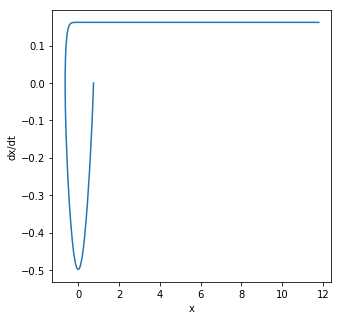

In [626]:
plt.figure(figsize=(5.,5.))
plt.xlabel('x')
plt.ylabel('dx/dt')
plt.plot(solution[:, 0], solution[:, 2])
plt.savefig('phase-og-3.png', dpi=200)

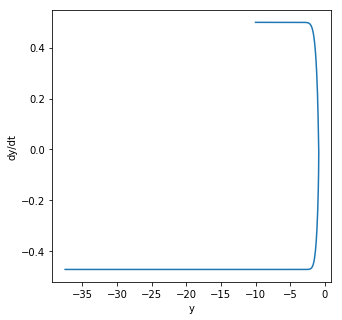

In [627]:
plt.figure(figsize=(5.,5.))
plt.xlabel('y')
plt.ylabel('dy/dt')
plt.plot(solution[:, 1], solution[:, 3])
plt.savefig('phase-og-4.png', dpi=200)